___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.grid'] = False

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp = pd.read_csv('./yelp.csv')
yelp

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


**Check the head, info , and describe methods on yelp.**

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


# __

# DISCONTINUING from FLOW
-
# Exploration of EDA

# __

# 

# 

# 

In [3]:
yelp.date

0       2011-01-26
1       2011-07-27
2       2012-06-14
3       2010-05-27
4       2012-01-05
           ...    
9995    2012-07-28
9996    2012-01-18
9997    2010-11-16
9998    2012-12-02
9999    2010-10-16
Name: date, Length: 10000, dtype: object

In [3]:
# Changing the Date's dtype
yelp['date'] = pd.to_datetime(yelp.date)

In [5]:
yelp.type.unique()

array(['review'], dtype=object)

In [6]:
yelp.drop(['type'], axis= 1, inplace= True)

In [7]:
yelp.business_id.nunique()

4174

In [8]:
yelp.review_id.nunique() #of course

10000

In [9]:
yelp.user_id.nunique()

6403

In [4]:
yelp.drop(['review_id'], axis= 1, inplace= True)

In [11]:
yelp.head()

,business_id,date,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Our goal is to classify the STARS.  
We need to get some kind of relationship between the Stars and the Test(review) - Also cool, useful and funny will help use to determine that.

So rather than looking for which business has got good reviews and which have got bad... we will drop that idea. And also drop the user columns as they don't add anything (except there are some users who always give good or bad reviews)


In [5]:
users_mean_reviews = (yelp.groupby(['user_id'])['stars'].mean()).sort_values(ascending= False)
users_mean_reviews

user_id
Pc6oM1OHdl82PUoumiPzmw    5.0
haJXuFgFFNZYYdFF50EJ8w    5.0
R8xAZICRKkz91tdMgXNGPA    5.0
DbFSdCeJNnc8Bxqg7HXIpw    5.0
hYph1O9SCO3B5tFmqzdOSA    5.0
                         ... 
pRw80rCPUTcBo2Zv5De1yQ    1.0
pU3iTU8tPggt81R8f57pTw    1.0
W4fBHIRoNh_qAJwORXKPpg    1.0
pcar062LKuhjXoe7E42YRA    1.0
zzmRKNph-pBHDL2qwGv9Fw    1.0
Name: stars, Length: 6403, dtype: float64

In [6]:
user_repetations = yelp.user_id.value_counts()
user_repetations[user_repetations > 5]

fczQCSmaWF78toLEmb0Zsw    38
0CMz8YaO3f8xu4KqQgKb9Q    25
90a6z--_CUrl84aCzZyPsg    22
0mqHhdKEdak_A1FBhFNXqA    18
4ozupHULqGyO42s3zNUzOQ    18
                          ..
nWouNfZD3Pw08RYizxkqcA     6
3Jw-rYwJEz6jSqPgVVmmhA     6
3uR5YTXgW4hatuFnaNxSGg     6
sALB8-F04S9VcZMF_GkGUA     6
jKeaOrPyJ-dI9SNeVqrbww     6
Name: user_id, Length: 183, dtype: int64

In [15]:
((users_mean_reviews == 1) & (user_repetations == 2)).sum()

8

In [16]:
((users_mean_reviews == 5) & (user_repetations == 5)).sum()

2

### Looking at these data, the repetation is low... so this will not affect our model.

So in summay:
* We will need also to drop `USER_ID` and `BUSINESS_ID` columns, as there is no such correlation with users and business with the kind of the message and the ratings.

In [7]:
yelp.drop(['user_id', 'business_id'], axis= 1, inplace= True)
yelp

,date,stars,text,type,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0
...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,1,2,0
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0


In [18]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10000 non-null  datetime64[ns]
 1   stars   10000 non-null  int64         
 2   text    10000 non-null  object        
 3   cool    10000 non-null  int64         
 4   useful  10000 non-null  int64         
 5   funny   10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 468.9+ KB


# __

# 

# CONTINUING to the FLOW

# 

# __

**Create a new column called "text length" which is the number of words in the text column.**

In [8]:
yelp['length'] = yelp.text.apply(len)

In [9]:
yelp

,date,stars,text,type,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469
...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,1,2,0,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0,880


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [101]:
#Done

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

#### Let's make the `Stars` columns as the category.

In [10]:
yelp['stars'] = yelp.stars.astype('category')
yelp

,date,stars,text,type,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469
...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,1,2,0,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0,880


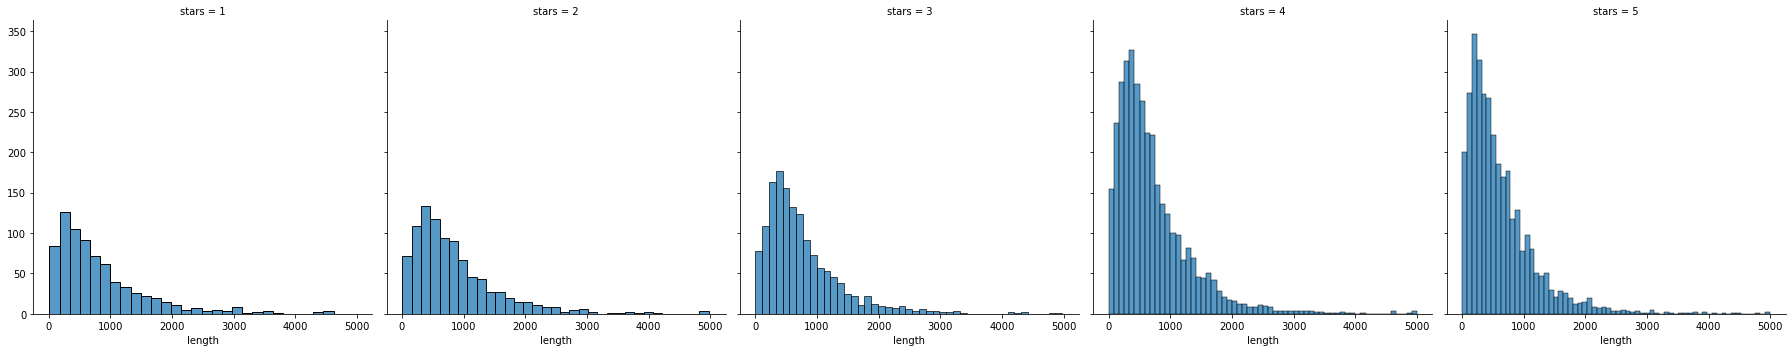

In [101]:
facet = sns.FacetGrid(yelp, col= 'stars', height= 5, aspect= 1)
facet.map(sns.histplot, 'length')

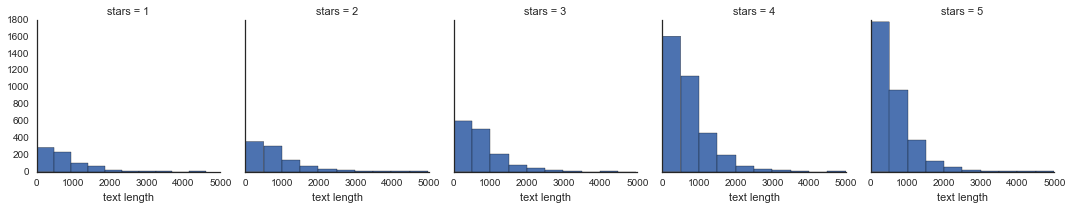

In [102]:
#Done

**Create a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='length'>

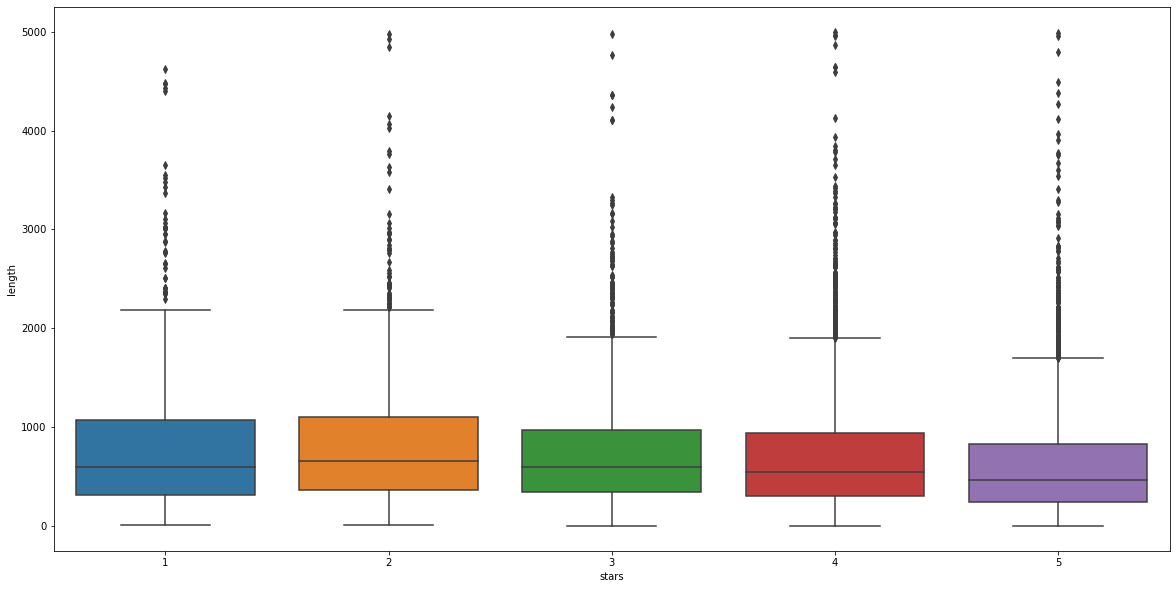

In [102]:
sns.boxplot(x= 'stars', y= 'length', data= yelp)

Oh, then here there is kind of no trend between the ratings and the length of the message... as we can see that the Median of for all of those categories is like the same.
Yes, the number of samples matter too...

In [107]:
yelp.groupby('stars').count()['date']

stars
1     749
2     927
3    1461
4    3526
5    3337
Name: date, dtype: int64

There are more ratings from **4 and 5**
#### Remember: It is not about the single business. It is about whole data and whole data is having more observations of 4 and 5 than others

    I also notice that, date doesn't contribute anything in deciding the theme of the text. So dropping that as well.

In [11]:
yelp.drop('date', axis= 1, inplace= True)

In [25]:
yelp

,stars,text,cool,useful,funny,length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469
...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,1,2,0,668
9996,4,Should be called house of deliciousness!\n\nI ...,0,0,0,881
9997,4,I recently visited Olive and Ivy for business ...,0,0,0,1425
9998,2,My nephew just moved to Scottsdale recently so...,0,0,0,880


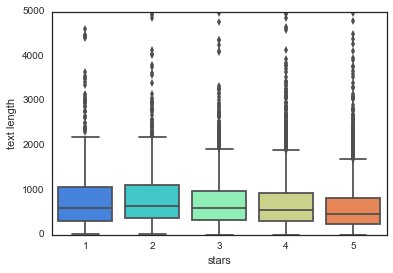

In [103]:
#Done

**Create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

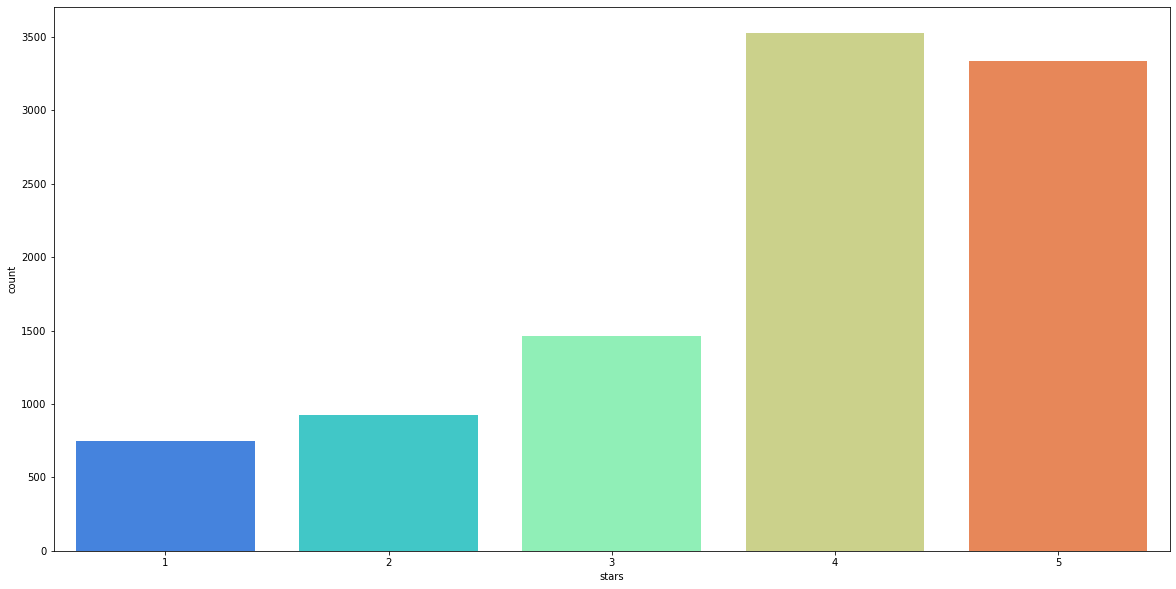

In [144]:
sns.countplot(x= 'stars', data= yelp, palette= 'rainbow')

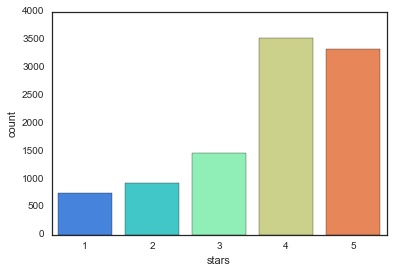

# 

## I wanted to calculate the Percentage per column...

`BY hand`

In [159]:
yelp.groupby('stars').sum().loc[1]['cool'] / yelp.cool.sum()

0.04927007299270073

In [160]:
yelp.groupby('stars').sum().loc[2]['cool'] / yelp.cool.sum()

0.07607208029197081

In [161]:
yelp.groupby('stars').sum().loc[3]['cool'] / yelp.cool.sum()

0.13138686131386862

In [162]:
yelp.groupby('stars').sum().loc[4]['cool'] / yelp.cool.sum()

0.38389598540145986

In [163]:
yelp.groupby('stars').sum().loc[5]['cool'] / yelp.cool.sum()

0.359375

In [165]:
0.359375 + 0.38389598540145986 + 0.13138686131386862 + 0.07607208029197081 + 0.04927007299270073

1.0

`VACTORIZED`

In [171]:
yelp[['cool', 'useful', 'funny', 'length']].sum()

cool         8768
useful      14093
funny        7013
length    7107387
dtype: int64

Much faster and convinient... right?

In [173]:
percentage = yelp.groupby('stars').sum() / yelp[['cool', 'useful', 'funny', 'length']].sum()
percentage

,cool,useful,funny,length
stars,,,,
1,0.049270,0.085291,0.112791,0.087101
2,0.076072,0.102817,0.115785,0.109854
3,0.131387,0.135457,0.144731,0.155917
4,0.383896,0.349251,0.337088,0.353684
5,0.359375,0.327184,0.289605,0.293444


In [182]:
percentage.round(2)

,cool,useful,funny,length
stars,,,,
1,0.05,0.09,0.11,0.09
2,0.08,0.10,0.12,0.11
3,0.13,0.14,0.14,0.16
4,0.38,0.35,0.34,0.35
5,0.36,0.33,0.29,0.29


#### Proved

In [174]:
percentage.sum()

cool      1.0
useful    1.0
funny     1.0
length    1.0
dtype: float64

## 

**Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [166]:
yelp.groupby('stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [105]:
#Done

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [183]:
yelp.corr()

,cool,useful,funny,length
cool,1.000000,0.887102,0.764342,0.241451
useful,0.887102,1.000000,0.723406,0.293975
funny,0.764342,0.723406,1.000000,0.251760
length,0.241451,0.293975,0.251760,1.000000


In [106]:
#Done

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<AxesSubplot:>

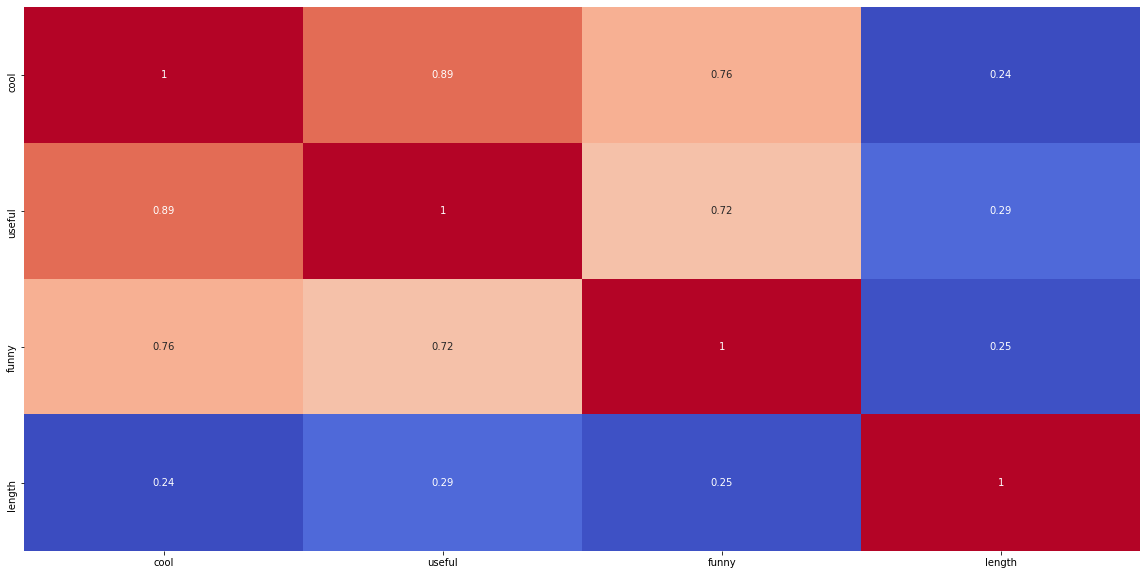

In [189]:
sns.heatmap(yelp.corr(), annot= True, cbar= False, cmap= 'coolwarm')

#### Length, seems to be unneccessary ... in the heatmap

<AxesSubplot:>

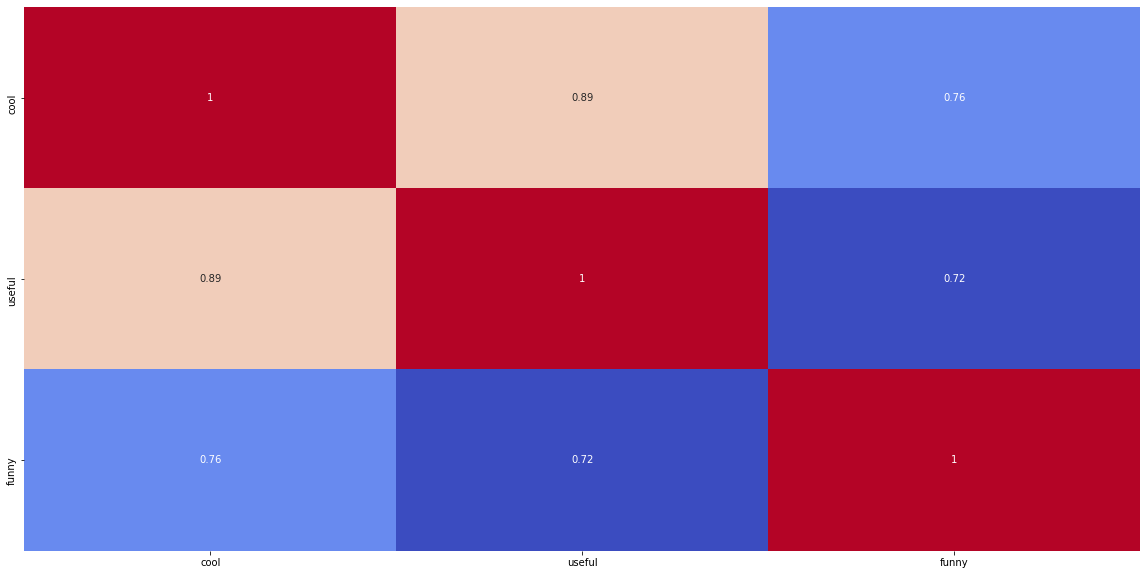

In [190]:
sns.heatmap(yelp[yelp.columns[:-1]].corr(), annot= True, cbar= False, cmap= 'coolwarm')

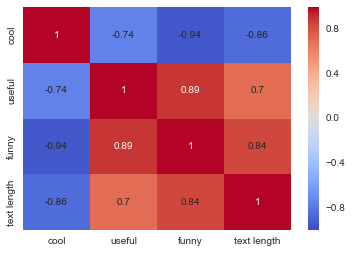

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [12]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [13]:
yelp_class

,stars,text,type,cool,useful,funny,length
0,5,My wife took me here on my birthday for breakf...,review,2,5,0,889
1,5,I have no idea why some people give bad review...,review,0,0,0,1345
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469
6,5,Drop what you're doing and drive here. After I...,review,7,7,4,1565
...,...,...,...,...,...,...,...
9990,5,Yes I do rock the hipster joints. I dig this ...,review,1,1,1,263
9991,5,Only 4 stars? \n\n(A few notes: The folks that...,review,1,1,0,908
9992,5,I'm not normally one to jump at reviewing a ch...,review,2,3,2,1326
9994,5,Let's see...what is there NOT to like about Su...,review,1,2,1,1968


**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [29]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

**Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [31]:
vectorizer = CountVectorizer()

In [196]:
X = vectorizer.fit_transform(X)
X

<4086x19183 sparse matrix of type '<class 'numpy.int64'>'
	with 317288 stored elements in Compressed Sparse Row format>

## Train Test Split

Let's split our data into training and testing data.

**Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101**

In [15]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Training a Model

Time to train a model!

**Import MultinomialNB and create an instance of the estimator and call is nb**

In [16]:
from sklearn.naive_bayes import MultinomialNB

**Now fit nb using the training data.**

In [201]:
nb = MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [202]:
nb.fit(X_train, y_train)

MultinomialNB()

**Create a confusion matrix and classification report using these predictions and y_test**

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [204]:
pred = nb.predict(X_test)

In [205]:
confusion_matrix(y_test, pred)

array([[ 173,   79],
       [  36, 1061]], dtype=int64)

In [206]:
accuracy_score(y_test, pred)

0.9147516679021498

In [208]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.83      0.69      0.75       252
           5       0.93      0.97      0.95      1097

    accuracy                           0.91      1349
   macro avg       0.88      0.83      0.85      1349
weighted avg       0.91      0.91      0.91      1349



[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

**Import TfidfTransformer from sklearn.**

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn.**

In [19]:
from sklearn.pipeline import Pipeline


**Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [212]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('Tf_idf', TfidfTransformer()),
    ('nb', MultinomialNB())]
)

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [220]:
X = yelp_class['text']
y = yelp_class['stars']

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [228]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Tf_idf', TfidfTransformer()), ('nb', MultinomialNB())])

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [229]:
pred = pipe.predict(X_test)

In [230]:
confusion_matrix(y_test, pred)

array([[   0,  247],
       [   0, 1102]], dtype=int64)

In [231]:
accuracy_score(y_test, pred)

0.8169014084507042

In [232]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       247
           5       0.82      1.00      0.90      1102

    accuracy                           0.82      1349
   macro avg       0.41      0.50      0.45      1349
weighted avg       0.67      0.82      0.73      1349



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 

# I guess... we need to do some feature eng. for the stop words and the puntuations.

* Remove Punctuations
* Remove Stop words
* Remove Numbers
* Make all of them small latters

In [20]:
X = yelp_class['text']
y = yelp_class['stars']

In [21]:
from nltk.corpus import stopwords
import string

In [22]:
stopwords = stopwords.words('english')
punctuations = string.punctuation
digits = string.digits

string_filter = punctuations + digits

In [23]:
def convert(text):
    simple_text = ''.join([char.lower() for char in text if char not in string_filter])
    return [word for word in simple_text.split() if word not in stopwords]

## Count Vec

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
pipe = Pipeline([
    ('vect', CountVectorizer(analyzer= convert)),
    ('nb', MultinomialNB())]
)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# 

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function convert at 0x00000067A08AB820>)),
                ('nb', MultinomialNB())])

In [69]:
pred = pipe.predict(X_test)

In [70]:
accuracy_score(y_test, pred)

0.9288361749444033

### Trying with other freak
TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
pipe = Pipeline([
    ('vect', CountVectorizer(analyzer= convert)),
    ('tf_idf', TfidfTransformer()),
    ('nb', MultinomialNB())]
)

In [74]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

In [75]:
accuracy_score(y_test, pred)

0.8250555967383247

### Whoah! It improved!

# 

# 

### Another - Along with the `COOL-USEFUL-FUNNY` cols

In [144]:
A = yelp_class['text']
B = yelp_class.iloc[:, 2:]
y = yelp_class['stars']

In [145]:
A = A.reset_index(drop= True)
B = B.reset_index(drop= True)
y = y.reset_index(drop= True)

In [179]:
from sklearn.preprocessing import MinMaxScaler

In [180]:
min_max_s = MinMaxScaler()

In [181]:
B = min_max_s.fit_transform(B)

In [183]:
vec = CountVectorizer(analyzer= convert)
vec = vec.fit(A)

In [184]:
tf = TfidfTransformer()
tf = tf.fit_transform(vec.transform(A))

# 

In [185]:
final = pd.DataFrame(tf.toarray(), columns= vec.get_feature_names())
final

,aa,aaa,aaaamazing,aaammmazzing,aaron,ab,aback,abandoned,abandoning,abbazabba,...,zumba,zupa,zupas,zuzu,zuzus,zwiebelkräuter,°,éclairs,école,ém
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
B = pd.DataFrame(B, columns= ['Basedon_COOL', 'Basedon_USE', 'Basedon_FUNNY', 'Basedon_LENGTH'])

In [188]:
final = final.join(B)
final

,aa,aaa,aaaamazing,aaammmazzing,aaron,ab,aback,abandoned,abandoning,abbazabba,...,zuzus,zwiebelkräuter,°,éclairs,école,ém,Basedon_COOL,Basedon_USE,Basedon_FUNNY,Basedon_LENGTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.025974,0.065789,0.000000,0.177309
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.268876
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,0.026316,0.000000,0.082932
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.092972
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.092105,0.102564,0.313052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,0.013158,0.025641,0.051606
4082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,0.013158,0.000000,0.181124
4083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.025974,0.039474,0.051282,0.265060
4084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,0.026316,0.025641,0.393976


In [189]:
nb = MultinomialNB()

In [190]:
nb.fit(final, y)

MultinomialNB()

In [191]:
pred = nb.predict(final)

In [192]:
accuracy_score(y, pred)

0.8188937836514929

### Aah, again same as before... bullshit!

# 

# 

# 

# 

# 

#### Kind of improved as we have removed the dots and others...

Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!